### PREDICTING HEART DISEASE 
This model is using python based libraries and modules with an objective of building machine learning model to predict whther a patient has a heart disease or not based on their medical attributes.

Approach : 
1.Problem defination
2.Data
3.Evaluation
4.Features
5.Modelling
6.Experimentation

### 1.Problem Defination :
Given clincial parameters about a patient whether the model will be able to predict patient having heart disease or not.

### 2.Data (UCI Dataset)
id (Unique id for each patient)1.
age (Age of the patient in yearsy2.)
sex (M (1)ale/Fem (0)al3.e)
cp chest pain type ([typical angina, atypical angina, non-anginal, asymptomati4.c])
trestbps resting blood pressure (resting blood pressure (in mm Hg on admission to the hospit5.al))
chol (serum cholesterol in m6.g/dl)
fbs (if fasting blood sugar > 120 7.mg/dl)
restecg (resting electrocardiographic results)
-- Values: [normal, stt abnormality, lv hype8.rtrophy]
thalach: maximum heart rate9. achieved
exang: exercise-induced angina (Tr10.ue/ False)
oldpeak: ST depression induced by exercise relat11.ive to rest
slope: the slope of the peak exercis12.e ST segment
ca: number of major vessels (0-3) colored b13.y fluoroscopy
thal: [normal; fixed defect; reve14 targetble defect]
num: the pre(heart disease (1) or not heart disease(0))

### 3.Evaluation
> If we can acquire efficiency of more than 95% then we will pursue with the machine learning model

### 4.Features : 
This is where you will get information about each feature in the dataset

**Create data dictionary**


*id (Unique id for each patient)*

*1.age (Age of the patient in years)*

*2.sex (Male (1)/Female (0))*

*3.cp chest pain type ([typical angina(0), atypical angina(1), non-anginal(2), asymptomatic(3)])*

*4.trestbps resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))*

*5.chol (serum cholesterol in mg/dl)*

*6.fbs (if fasting blood sugar > 120 mg/dl)*

*7.restecg (resting electrocardiographic results)*
-- Values: [normal, stt abnormality, lv hypertrophy]

*8.thalach: maximum heart rate achieved*

*9.exang: exercise-induced angina (True/ False)*

*10.oldpeak: ST depression induced by exercise relative to rest*

*11.slope: the slope of the peak exercise ST segment*

*12.ca: number of major vessels (0-3) colored by fluoroscopy*

*13.thal: [normal; fixed defect; reversible defect]*

*14 target: the predicted attribute(heart disease (1) or not heart disease(0))*







dicted attributeedicted attribute







### Preparing the tools
We're going to use pandas, NumPy, matplotlib

In [247]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#Models from scikit-learn
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# Models evaluation
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV,cross_val_score,train_test_split
from sklearn.metrics import confusion_matrix,classification_report,precision_score,recall_score,f1_score,roc_curve,roc_auc_score

### LOAD DATA

In [11]:
df = pd.read_csv("heart-disease.csv")
df.shape

(303, 14)

### EDA

In [17]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [16]:
df["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline 

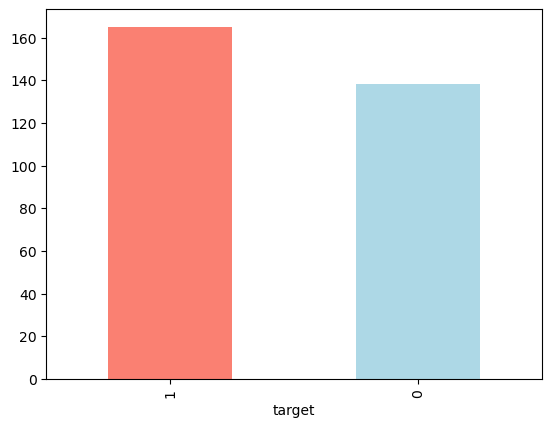

In [79]:
df["target"].value_counts().plot(kind = "bar" ,color= ["salmon","lightblue"]);
plt.show()


In [35]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [54]:
a = df.describe()
a

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [51]:
a = df.describe()

print(f'{a["target"]["mean"]*100:.2f} % people in the given datset have heart disease on a mean value')

54.46 % people in the given datset have heart disease on a mean value


In [55]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [57]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [58]:
# Heart disease frequency based on sex
df["sex"].value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [59]:
pd.crosstab(df["target"],df["sex"])

sex,0,1
target,,
0,24,114
1,72,93


In [72]:
b= 93/207 *100
print(f'{round(b,2)} % men have heart disease')

44.93 % men have heart disease


In [74]:
c = 72/96 *100
print(f'{round(c,2)} % women have heart disease')

75.0 % women have heart disease


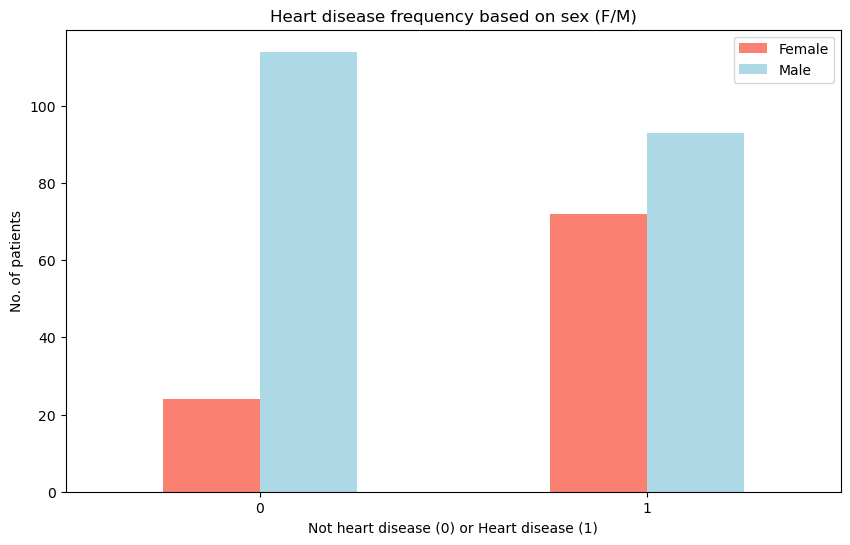

In [103]:
pd.crosstab(df["target"],df["sex"]).plot(kind = "bar",figsize=(10,6),color=["salmon","lightblue"])
plt.legend(["Female","Male"])
plt.title("Heart disease frequency based on sex (F/M)")
plt.xlabel("Not heart disease (0) or Heart disease (1)")
plt.ylabel("No. of patients")
plt.xticks(rotation=0)
plt.show()

### Age Vs max heart rate (thalach) for heart disease

In [111]:
df["thalach"].value_counts()


thalach
162    11
160     9
163     9
152     8
173     8
       ..
202     1
184     1
121     1
192     1
90      1
Name: count, Length: 91, dtype: int64

In [112]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


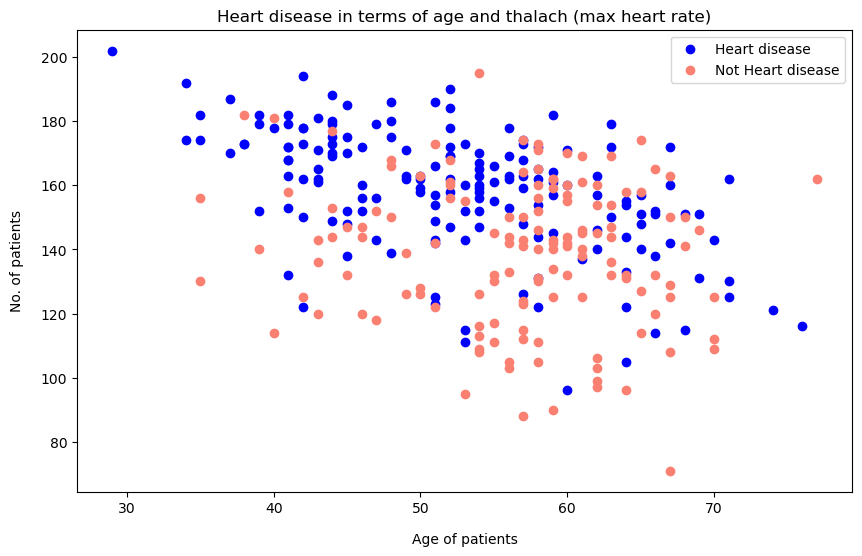

In [148]:
plt.figure(figsize=(10,6))

plt.scatter(df["age"][df.target == 1],
            df["thalach"][df.target == 1],
            c= "blue")

plt.scatter(df["age"][df.target == 0],
            df["thalach"][df.target == 0],
            c= "salmon")
plt.title("Heart disease in terms of age and thalach (max heart rate)")
plt.xlabel("Age of patients",labelpad=12)
plt.ylabel("No. of patients",labelpad=12)
plt.legend(["Heart disease","Not Heart disease"])
plt.show()


In [130]:
df["age"][df.target == 1]

0      63
1      37
2      41
3      56
4      57
       ..
160    56
161    55
162    41
163    38
164    38
Name: age, Length: 165, dtype: int64

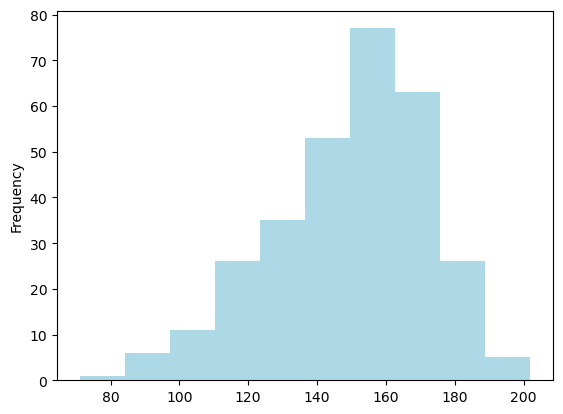

In [153]:
df["thalach"].plot(kind="hist",color= "lightblue")
plt.show()

### Heart disease frequency based on cp (chest pain type)
([typical angina(0), atypical angina(1), non-anginal(2), asymptomatic(3)])


In [154]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [156]:
pd.crosstab(df["cp"],df["target"])

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


In [157]:
df["sex"].value_counts()

sex
1    207
0     96
Name: count, dtype: int64

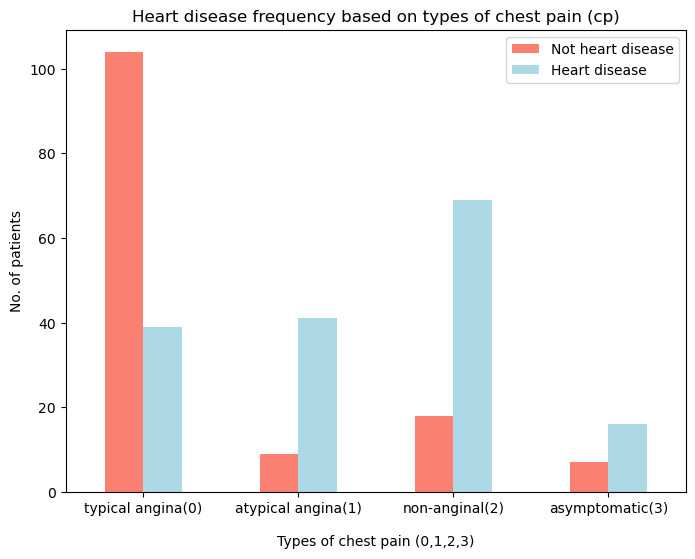

In [190]:
pd.crosstab(df["cp"],df["target"]).plot(kind= "bar",
           figsize = (8,6),
            color = ["salmon","lightblue"])
plt.title("Heart disease frequency based on types of chest pain (cp)")
plt.xlabel("Types of chest pain (0,1,2,3)",labelpad=14)
plt.ylabel("No. of patients")
plt.legend(["Not heart disease","Heart disease"])
plt.xticks(ticks = [0,1,2,3],rotation = 0,labels=["typical angina(0)", "atypical angina(1)", "non-anginal(2)", "asymptomatic(3)"])
plt.show()

In [191]:
# Making a correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


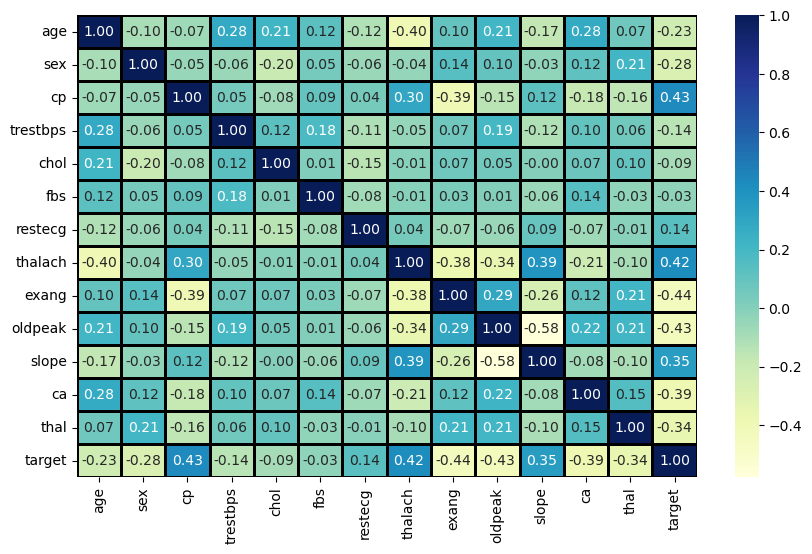

In [216]:
# Making corr matrix more visual
corr_matrix = df.corr()

fig,ax = plt.subplots(figsize = (10,6))
ax = sns.heatmap(corr_matrix,annot=True,linewidths=2,linecolor="black",fmt = ".2f",cmap = "YlGnBu")



plt.show()

## Modelling

In [217]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [228]:
x = df.drop("target",axis = 1)

In [229]:
y = df["target"]

In [230]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [231]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [232]:
np.random.seed(42)

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)


In [254]:
# We are going to test 3 machine learning models : 
#a. LogisiticRegression
#b. KestNeigNearhborsClassifier
#c. RandomForestClassifier
from sklearn.linear_model import LogisticRegression
models = {"Logistic Regression" : LogisticRegression(),
          "KNN" : KNeighborsClassifier(),
          "Random Forest" : RandomForestClassifier()}

def fit_and_score(models,x_train,x_test,y_train,y_test):
    np.random.seed(42)
    model_scores = {}
    for name,model in models.items():
        model.fit(x_train,y_train)
        model_scores[name] = model.score(x_test,y_test)*100
    return model_scores

model_scores = fit_and_score(models = models,x_train=x_train,x_test = x_test,y_train = y_train,y_test = y_test)
model_scores

C:\Users\mtyag\heart-disease-project\env\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 88.52459016393442,
 'KNN': 68.85245901639344,
 'Random Forest': 83.60655737704919}

### Model comparison

In [255]:
model_compare = pd.DataFrame(model_scores,index=["accuracy"])

In [256]:
model_compare

,Logistic Regression,KNN,Random Forest
accuracy,88.52459,68.852459,83.606557


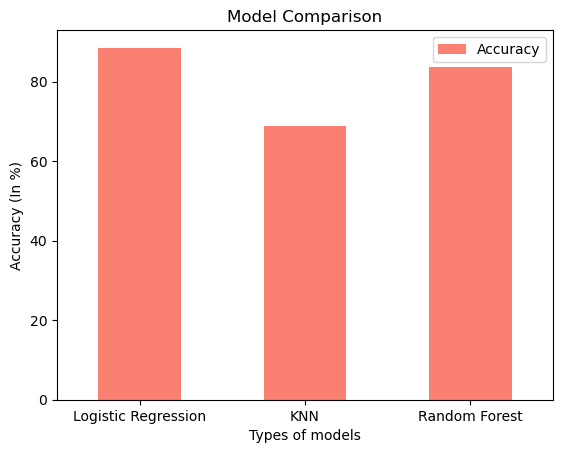

In [266]:
model_compare.T.plot(kind= "bar",color=["salmon"])
plt.xticks(rotation = 0)
plt.title("Model Comparison")
plt.xlabel("Types of models")
plt.ylabel("Accuracy (In %)")
plt.legend(["Accuracy"])




plt.show()

### Tuning hyperparamters for classification machine learning model

### Following :
* Hyperparamters tuning
* Features importance
* confusion matrix
* cross validation score
* f1 score
* recall score
* precision score
* classification report
* roc_curve
* area under the curve




### KNN tuning

In [275]:
train_scores = []
test_scores = []

neighbors = range(1,21)

knn_model = KNeighborsClassifier()

for i in neighbors: 
    knn_model.set_params(n_neighbors = i)
    knn_model.fit(x_train,y_train)

    train_scores.append(knn_model.score(x_train,y_train))
    test_scores.append(knn_model.score(x_test,y_test))

The max score for this model is  75.41 %


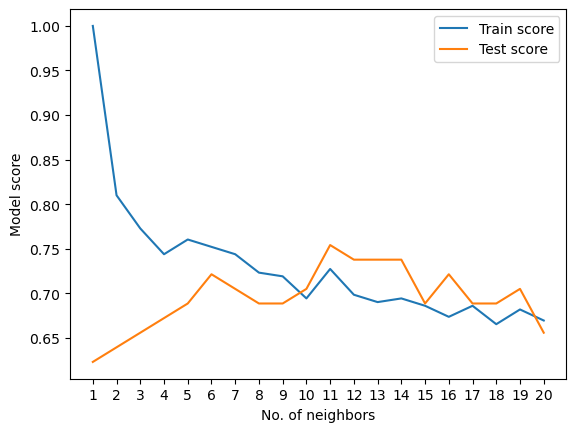

In [284]:
plt.plot(neighbors,train_scores,label = "Train score")
plt.plot(neighbors,test_scores,label = "Test score")
plt.xticks(np.arange(1,21,1))
plt.xlabel("No. of neighbors")
plt.ylabel("Model score")
plt.legend()
print(f'The max score for this model is {max(test_scores)*100 : .2f} %')

plt.show()


# Hyperparameters tuning using RandomizedSearchCV

## We are ging to tune two models : 
1 . RandomForestClassifier

2 . Logistic Regression

In [309]:
log_reg_grid = { "C" : np.logspace(-4,4,20),
                "solver" : ["liblinear"]
               }

rand_for_class_grid = {"n_estimators" : np.arange(10,1000,50),
                       "max_depth": [None,3,5,10],
                       "min_samples_split" : np.arange(2,20,2),
                       "min_samples_leaf":np.arange(1,20,2)
                      }

In [304]:
  #tune Logistic regression

np.random.seed(42)
rs_log_reg_grid = RandomizedSearchCV(LogisticRegression(),
                                    param_distributions=log_reg_grid,
                                    cv = 5,
                                    n_iter=20,
                                    verbose=True)


rs_log_reg_grid.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [305]:
rs_log_reg_grid.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [306]:
rs_log_reg_grid.score(x_test,y_test) *100

88.52459016393442

# Now we will tune random forest classifier model



In [313]:
np.random.seed(42)
rs_ran_for_class_grid = RandomizedSearchCV(RandomForestClassifier(),
                                    param_distributions=rand_for_class_grid,
                                    cv = 5,
                                    n_iter=20,
                                    verbose=True)


rs_ran_for_class_grid.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [314]:
rs_ran_for_class_grid.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [324]:
f = rs_ran_for_class_grid.score(x_test,y_test) *100

In [328]:
g = model_scores["Random Forest"]

round(f-g,2
     ) 

6.56

# Hyperparamter tuning with GridSearchCV
**Since our logistic regression model even after tuning with randomizedsearchcv is still giving similar scores, so now we are going to use GridSearchCV on logistic regression model to further improve the model scores**


In [329]:
log_reg_grid1 = {"C" : np.logspace(-4,4,30),
                "solver" : ["liblinear"]
                } 

gs_log_reg_grid = GridSearchCV(LogisticRegression(),
                              param_grid=log_reg_grid1,
                              cv=5,
                              verbose=True)

gs_log_reg_grid.fit(x_train,y_train)


Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [330]:
gs_log_reg_grid.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [332]:
gs_log_reg_grid.score(x_test,y_test) * 100

88.52459016393442

### Following :
  
* roc_curve
* area under the curve


# Evaluation

### for classifier
roc curve,auc curve,f1 scoce,precision score, classification report, recall score
and if possible get cross val score

In [340]:
y_preds = gs_log_reg_grid.predict(x_test)
y_preds.shape

(61,)

In [337]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

In [341]:
y_test.shape

(61,)

In [356]:
print(confusion_matrix(y_test,y_preds))

[[25  4]
 [ 3 29]]


In [359]:
sns.set(font_scale=1.5)


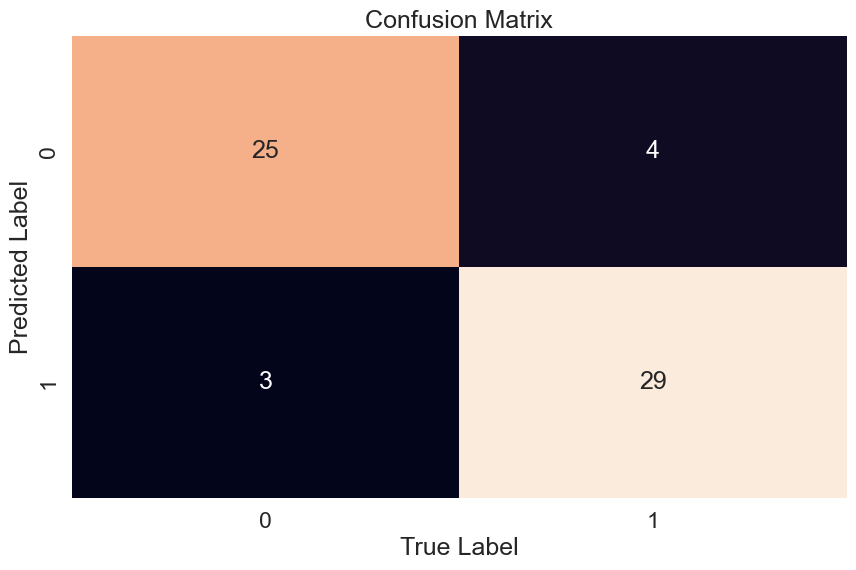

In [375]:
def plot_conf_mat(y_test,y_preds):
    fig,ax = plt.subplots(figsize = (10,6))
    ax = sns.heatmap(confusion_matrix(y_test,y_preds),
                    annot= True,
                    cbar = False)
    plt.xlabel("True Label")
    plt.ylabel("Predicted Label")
    plt.title("Confusion Matrix")

plot_conf_mat(y_test,y_preds)
plt.show()
    
    
                     
    
    

### Class report

In [376]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### Cross val score

In [377]:
gs_log_reg_grid.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [379]:
clf = LogisticRegression(C = 0.20433597178569418,solver = "liblinear")


In [384]:
cross_acc = cross_val_score(clf,x,y,cv = 5,scoring="accuracy")
cross_acc = cross_acc.mean()
cross_acc

0.8446994535519124

In [385]:
cross_f1 = cross_val_score(clf,x,y,cv = 5,scoring="f1")
cross_f1 = cross_f1.mean()
cross_f1

0.8673007976269721

In [386]:
cross_recall = cross_val_score(clf,x,y,cv = 5,scoring="recall")
cross_recall = cross_recall.mean()
cross_recall

0.9212121212121213

In [387]:
cross_precision = cross_val_score(clf,x,y,cv = 5,scoring="precision")
cross_precision = cross_precision.mean()
cross_precision

0.8207936507936507

In [394]:
# Visualize cross val score
cv_metrics = pd.DataFrame({"Accuracy":cross_acc,
                          "Recall": cross_recall,
                          "Precision": cross_precision,
                          "F1" : cross_f1},
                         index = [0])
cv_metrics

,Accuracy,Recall,Precision,F1
0,0.844699,0.921212,0.820794,0.867301


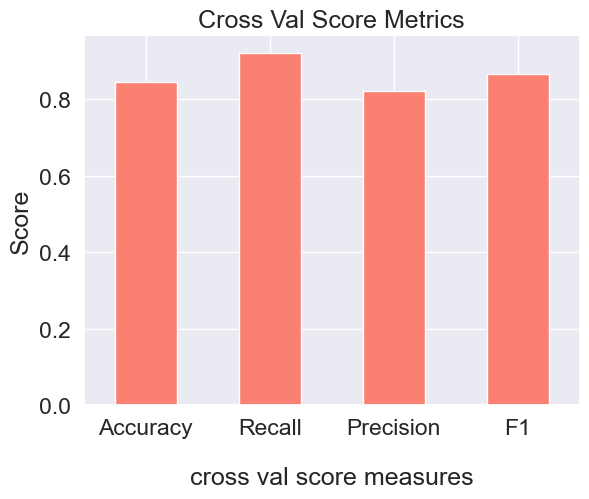

In [407]:
cv_metrics.T.plot(kind = "bar",color = ["salmon"],legend = False)
plt.title("Cross Val Score Metrics")
plt.ylabel("Score")
plt.xlabel("cross val score measures",labelpad=20)
plt.xticks(rotation = 0)


plt.show()

### Features importance

In [408]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
